In [8]:
# Install Libraries
!pip install moviepy
!pip install -U openai-whisper
!pip install pydub
!pip install key-frame-detector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuspa

In [9]:
from google.colab import drive
drive.mount('/content/drive')
import os
cwd = os.path.join('/content/drive','MyDrive','Working log')
print(cwd)
os.chdir(cwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Working log


In [17]:
# Convert MP4 files to WAV
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Function to process audio file and remove silence
def process_audio(input_file, output_file):
    # Load audio file
    audio = AudioSegment.from_file(input_file)

    # Split audio on silence
    chunks = split_on_silence(
        audio,
        min_silence_len=500,
        silence_thresh=audio.dBFS - 14,
        keep_silence=200
    )

    # Create new audio file without silence
    processed_audio = AudioSegment.silent(duration=0)
    for chunk in chunks:
        processed_audio += chunk

    # Export the processed audio
    processed_audio.export(output_file, format="wav")

# Input and output directories in Google Drive
input_directory = '/content/drive/MyDrive/Working log/Videos 2'
output_directory = '/content/drive/MyDrive/Working log/Wav Videos'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Get list of all MP4 files in the input directory
mp4_files = [f for f in os.listdir(input_directory) if f.endswith('.mp4')]

# Process up to 200 files
for i, input_file in enumerate(mp4_files[:200]):
    input_path = os.path.join(input_directory, input_file)
    output_file = f'file{1+i}.wav'
    output_path = os.path.join(output_directory, output_file)
    process_audio(input_path, output_path)
    print(f"Processed {input_file} and saved as {output_file}")

Processed 1574351214838-191121SOTSmaffeifull_L.mp4 and saved as file1.wav
Processed 1575990970279-940davecoterobjohnsonfullinterview_L.mp4 and saved as file2.wav
Processed 1574351214838-191121SOTSmaffeifull_L(1).mp4 and saved as file3.wav
Processed 1571831944815-745biogenceomichelvounatsos_L.mp4 and saved as file4.wav
Processed 1572356378613-928muilenburgfullgaggle_L.mp4 and saved as file5.wav
Processed 1575661739825-191206SLAGERceo_L.mp4 and saved as file6.wav
Processed 1563892088183-190723SOTSquinceyfull_L.mp4 and saved as file7.wav
Processed 1569946251067-191001SAabneyfull_L.mp4 and saved as file8.wav
Processed 1589213194407-200511SAdisneyfull_L.mp4 and saved as file9.wav
Processed 1586990597283-4ED6-MM-B-BLOCK-041520_L.mp4 and saved as file10.wav
Processed 1585255908051-CB200326hertz_L.mp4 and saved as file11.wav
Processed 1585083487099-CB200324bloomenergy_L.mp4 and saved as file12.wav
Processed 1588770782697-4ED1-SB-050620-GM_L.mp4 and saved as file13.wav
Processed 1584730449776-2

Streaming output truncated to the last 5000 lines.
Extracting features from /content/drive/My Drive/Working log/Datasets/ravdess/audio_speech_actors_01-24/Actor_10/03-01-08-02-02-01-10.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/ravdess/audio_speech_actors_01-24/Actor_10/03-01-08-02-01-01-10.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/ravdess/audio_speech_actors_01-24/Actor_10/03-01-08-02-02-02-10.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/ravdess/audio_speech_actors_01-24/Actor_10/03-01-08-02-01-02-10.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/ravdess/audio_speech_actors_01-24/Actor_10/03-01-08-01-02-02-10.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/ravdess/audio_speech_actors_01-24/Actor_11/03-01-02-01-02-02-11.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/ravdess/audio_speech_actors_01-24

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Streaming output truncated to the last 5000 lines.
Extracting features from /content/drive/My Drive/Working log/Datasets/cremad/AudioWAV/1061_DFA_ANG_XX.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/cremad/AudioWAV/1061_IEO_HAP_HI.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/cremad/AudioWAV/1061_IEO_HAP_MD.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/cremad/AudioWAV/1061_DFA_FEA_XX.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/cremad/AudioWAV/1061_IEO_FEA_MD.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/cremad/AudioWAV/1061_IEO_NEU_XX.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/cremad/AudioWAV/1061_IEO_ANG_HI.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/cremad/AudioWAV/1060_WSI_HAP_XX.wav...
Extracting features from /content/drive/My Drive/Working log/Datasets/cremad/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 40s 164ms/step - accuracy: 0.2910 - loss: 1.8792 - val_accuracy: 0.4553 - val_loss: 1.3808
Epoch 2/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.4575 - loss: 1.3973 - val_accuracy: 0.5105 - val_loss: 1.2530
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.5017 - loss: 1.2810 - val_accuracy: 0.5345 - val_loss: 1.1805
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 35s 157ms/step - accuracy: 0.5525 - loss: 1.1506 - val_accuracy: 0.5402 - val_loss: 1.1771
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 34s 155ms/step - accuracy: 0.5669 - loss: 1.1129 - val_accuracy: 0.5555 - val_loss: 1.1701
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 161ms/step - accuracy: 0.5919 - loss: 1.0547 - val_accuracy: 0.5485 - val_loss: 1.1554
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 40s 157ms/step - accuracy: 0.6237 - loss: 0.9750 - val_accuracy: 0.5408 - val_loss: 1.2138
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 42s 162ms/step - accuracy: 0.6510 -

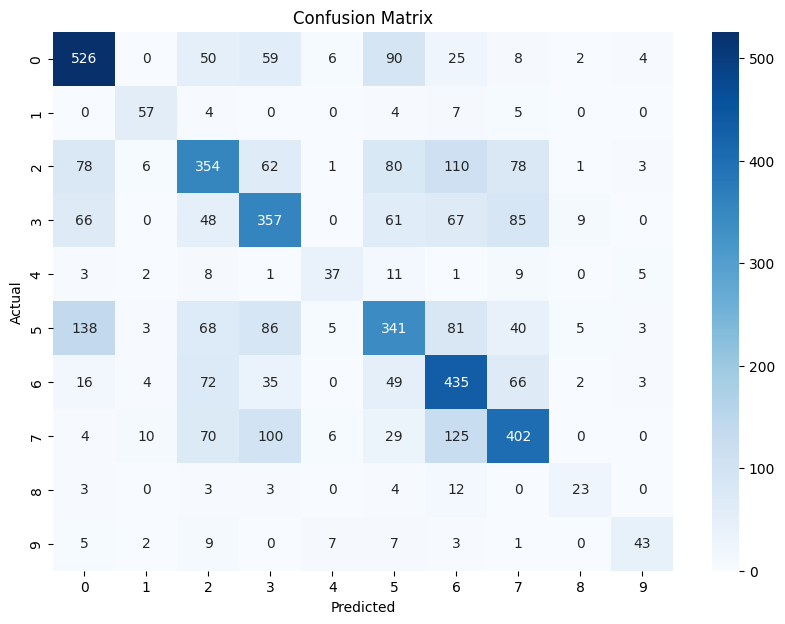

In [21]:
# Using RAVDESS, TESS, SAVEE, CREMA-D

import pandas as pd
import numpy as np
import os
import librosa
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the directory where the datasets are stored in your Google Drive
savee_path = '/content/drive/My Drive/Working log/Datasets/savee/ALL'
ravdess_path = '/content/drive/My Drive/Working log/Datasets/ravdess/audio_speech_actors_01-24'
tess_path = '/content/drive/My Drive/Working log/Datasets/tess/TESS Toronto emotional speech set data'
crema_path = '/content/drive/My Drive/Working log/Datasets/cremad/AudioWAV'
local_wav_path = "/content/drive/My Drive/Working log/Wav Videos"

# List directories to verify extraction
print("Savee files:", os.listdir(savee_path))
print("Ravdess files:", os.listdir(ravdess_path))
print("TESS files:", os.listdir(tess_path))
print("CREMA-D files:", os.listdir(crema_path))

# Function to extract features from audio files
def extract_features(data, sample_rate):
    result = np.array([])

    if len(data) < 1:
        return result

    try:
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
        result = np.hstack((result, zcr))

        chroma = np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))

        mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)
        result = np.hstack((result, mfcc))

        rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
        result = np.hstack((result, rms))

        mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel_spectrogram))
    except Exception as e:
        print(f"Error extracting features from audio data: {e}")

    return result

# Load and process your local WAV files
local_file_paths = []
local_emotions = []

print("Processing local WAV files...")
for root, dirs, files in os.walk(local_wav_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            local_file_paths.append(file_path)
            local_emotions.append('unknown')  # Placeholder for local file labels

# Create a dataframe for local WAV files
local_df = pd.DataFrame({'Path': local_file_paths, 'Emotions': local_emotions})

# Process Savee dataset
print("Processing Savee dataset...")
savee_file_emotion = []
savee_file_path = []

for file in os.listdir(savee_path):
    if file.endswith(".wav"):
        file_path = os.path.join(savee_path, file)
        savee_file_path.append(file_path)
        part = file.split('_')
        ele = part[1][0]
        if ele == 'a':
            savee_file_emotion.append('angry')
        elif ele == 'd':
            savee_file_emotion.append('disgust')
        elif ele == 'f':
            savee_file_emotion.append('fear')
        elif ele == 'h':
            savee_file_emotion.append('happy')
        elif ele == 'n':
            savee_file_emotion.append('neutral')
        elif ele == 'sa':
            savee_file_emotion.append('sad')
        else:
            savee_file_emotion.append('surprise')

savee_emotion_df = pd.DataFrame(savee_file_emotion, columns=['Emotions'])
savee_path_df = pd.DataFrame(savee_file_path, columns=['Path'])
savee_df = pd.concat([savee_emotion_df, savee_path_df], axis=1)

# Process Ravdess dataset
print("Processing Ravdess dataset...")
ravdess_file_emotion = []
ravdess_file_path = []

for actor_num in range(1, 25):
    actor_folder = f'Actor_{actor_num:02}'
    actor_path = os.path.join(ravdess_path, actor_folder)
    for file in os.listdir(actor_path):
        if file.endswith('.wav'):
            file_path = os.path.join(actor_path, file)
            ravdess_file_path.append(file_path)
            emotion = file.split('-')[2]
            emotion_map = {
                '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry',
                '06': 'fearful', '07': 'disgust', '08': 'surprised'
            }
            ravdess_file_emotion.append(emotion_map[emotion])

ravdess_emotion_df = pd.DataFrame(ravdess_file_emotion, columns=['Emotions'])
ravdess_path_df = pd.DataFrame(ravdess_file_path, columns=['Path'])
ravdess_df = pd.concat([ravdess_emotion_df, ravdess_path_df], axis=1)

# Process TESS dataset
print("Processing TESS dataset...")
tess_file_emotion = []
tess_file_path = []

tess_emotion_mapping = {
    'happy': 'happy',
    'pleasant_surprise': 'pleasant surprise',
    'fear': 'fear',
    'angry': 'angry',
    'disgust': 'disgust',
    'sad': 'sad',
    'neutral': 'neutral'
}

for root, dirs, files in os.walk(tess_path):
    for file in files:
        if file.endswith('.wav'):
            for key in tess_emotion_mapping.keys():
                if key in file:
                    emotion = tess_emotion_mapping[key]
                    file_path = os.path.join(root, file)
                    tess_file_path.append(file_path)
                    tess_file_emotion.append(emotion)

# Create DataFrame for TESS dataset
tess_emotion_df = pd.DataFrame(tess_file_emotion, columns=['Emotions'])
tess_path_df = pd.DataFrame(tess_file_path, columns=['Path'])
tess_df = pd.concat([tess_emotion_df, tess_path_df], axis=1)

# Process CREMA-D dataset
print("Processing CREMA-D dataset...")
crema_file_emotion = []
crema_file_path = []

for file in os.listdir(crema_path):
    if file.endswith('.wav'):
        file_path = os.path.join(crema_path, file)
        crema_file_path.append(file_path)
        emotion = file.split('_')[2]
        emotion_map = {
            'SAD': 'sad', 'ANG': 'angry', 'DIS': 'disgust', 'FEA': 'fear',
            'HAP': 'happy', 'NEU': 'neutral'
        }
        crema_file_emotion.append(emotion_map[emotion])

crema_emotion_df = pd.DataFrame(crema_file_emotion, columns=['Emotions'])
crema_path_df = pd.DataFrame(crema_file_path, columns=['Path'])
crema_df = pd.concat([crema_emotion_df, crema_path_df], axis=1)

# Combine Savee, Ravdess, TESS, and CREMA-D datasets
train_df = pd.concat([savee_df, ravdess_df, tess_df, crema_df], axis=0)

# Function to extract features from audio files
def get_features(path):
    try:
        data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
        if len(data) < 1:
            raise ValueError(f"File {path} is too short or empty.")
        print(f"Extracting features from {path}...")
        return extract_features(data, sample_rate)
    except Exception as e:
        print(f"Error processing {path}: {e}")
        return np.zeros(40)

# Extract features for all training files
print("Extracting features for training data...")
X = np.array([get_features(path) for path in train_df.Path])
Y = train_df['Emotions'].values

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
# test_size=0.2 Train accuracy: 97, Test accuracy: 56
# test_size=0.3 aTrain accuracy: 98, Test accuracy: 55
# test_size=0.4 Train accuracy: 99, Test accuracy: 54
# test_size=0.5 Train accuracy: 99, Test accuracy: 53

# Print shapes of arrays
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

# Encode labels
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

# One-hot encode labels
onehot_encoder = OneHotEncoder(sparse_output=False)
Y_train = onehot_encoder.fit_transform(Y_train.reshape(-1, 1))
Y_test = onehot_encoder.transform(Y_test.reshape(-1, 1))

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Define the model
model = Sequential([
    Conv1D(64, 8, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, 8, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(256, 8, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(Y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

# Predictions
Y_pred = model.predict(X_test)
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(Y_test_labels, Y_pred_labels))
print("Classification Report:")
print(classification_report(Y_test_labels, Y_pred_labels, target_names=encoder.classes_))

# Confusion matrix
cm = confusion_matrix(Y_test_labels, Y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=onehot_encoder.categories_[0], yticklabels=onehot_encoder.categories_[0])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [22]:
import pandas as pd
import numpy as np
import os

# Function to determine sentiment based on detected emotion
def determine_sentiment(emotion):
    positive_emotions = ['happy', 'calm', 'pleasant surprise']
    negative_emotions = ['angry', 'disgust', 'fear', 'sad']
    if emotion in positive_emotions:
        return 'positive'
    elif emotion in negative_emotions:
        return 'negative'
    else:
        return 'neutral'  # Default or neutral sentiment for unknown emotions

# Path to the directory with WAV files
local_wav_path = '/content/drive/MyDrive/Working log/Wav Videos'

# Load and process local WAV files
local_file_paths = []
local_emotions = []

print("Processing local WAV files...")
for root, dirs, files in os.walk(local_wav_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            local_file_paths.append(file_path)
            local_emotions.append('unknown')  # Placeholder for local file labels

# Create a DataFrame for local WAV files
local_df = pd.DataFrame({'Path': local_file_paths, 'Emotions': local_emotions})

# Extract features for local WAV files
print("Extracting features for local WAV files...")
local_X = np.array([get_features(path) for path in local_df.Path])

# Normalize features
local_X = scaler.transform(local_X)
local_X = np.expand_dims(local_X, axis=2)

# Make predictions for local files
local_Y_pred = model.predict(local_X)
local_Y_pred_labels = np.argmax(local_Y_pred, axis=1)

# Map predictions back to emotion labels
local_emotion_labels = encoder.inverse_transform(local_Y_pred_labels)
local_sentiments = [determine_sentiment(emotion) for emotion in local_emotion_labels]

# Create DataFrame with predictions
local_predictions_df = pd.DataFrame({
    'WAV File Name': [os.path.basename(path) for path in local_df.Path],
    'Detected Emotions': local_emotion_labels,
    'Sentiment': local_sentiments
})

# Save the DataFrame to an Excel file
excel_path = '/content/drive/MyDrive/Working log/Emotion_Sentiment_Results.xlsx'
local_predictions_df.to_excel(excel_path, index=False)

print(f"Results saved to {excel_path}")


Processing local WAV files...
Extracting features for local WAV files...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file97.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file98.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file101.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file102.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file103.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file106.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file107.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file108.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file109.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Videos/file110.wav...
Extracting features from /content/drive/MyDrive/Working log/Wav Video

In [47]:
from google.colab import files

# Upload the two Excel files
uploaded = files.upload()

Saving 200 Sentiment Analysis.xlsx to 200 Sentiment Analysis.xlsx
Saving 10000 for compare sentiment.xlsx to 10000 for compare sentiment (2).xlsx


In [48]:
import pandas as pd

# Read the uploaded Excel files
df1 = pd.read_excel('10000 for compare sentiment.xlsx')
df2 = pd.read_excel('200 Sentiment Analysis.xlsx')

print(df1.columns)
print(df2.columns)

# Merge the DataFrames on a common column (e.g., 'ID')
merged_df = pd.merge(df1, df2, on='videoID')

# Save the merged DataFrame to a new Excel file
merged_df.to_excel('merged_file.xlsx', index=False)

# Download the merged file
files.download('merged_file.xlsx')

print("Files merged and downloaded successfully!")


Index(['videoID', 'webUrl', 'contentUrl', 'Title', 'Description',
       'Upload Date', 'Ticker Symbol', 'Company Name', 'Stock Ticker'],
      dtype='object')
Index(['videoID', 'webUrl', 'contentUrl', 'Title', 'Description',
       'Upload Date', 'Company Name', 'Company Ticker', 'WAV File Name',
       'Detected Emotions', 'Sentiment', 'Stock Price (at Upload Date)',
       'Stock Price (24 hr after Upload)', 'Up or Down'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Files merged and downloaded successfully!
